<h1>Imports</h1>

In [21]:
import numpy as np
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import tensorflow as tf

In [23]:
import keras
keras.__version__

'3.3.3'

In [24]:
%matplotlib inline

In [25]:
import cv2

In [26]:
# adds a progressbar
from tqdm.notebook import tqdm

# set seaborn graphs to a better style
sns.set(style="ticks")

In [27]:
import os, sklearn

<h1>Loading data</h1>

In [28]:
data_path = r"C:\Users\tisha\Documents\GitHub\adv_python_project\face_age"

In [29]:
from sklearn.model_selection import train_test_split

def load_images(data_path, img_size=(200, 200), test_size=0.15, random_state=42):
    images = []
    labels = []

    for age_folder in os.listdir(data_path):
        age_path = os.path.join(data_path, age_folder)
        if os.path.isdir(age_path):
            for img_name in os.listdir(age_path):
                img_path = os.path.join(age_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(int(age_folder))

    images = np.array(images)
    labels = np.array(labels)
    images = images / 255.0

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

<h1>Processing data</h1>

In [30]:
X_train, X_test, y_train, y_test = load_images(data_path)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

KeyboardInterrupt: 

<h1>Creating model</h1>

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [63]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128, activation='swish'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='swish'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

#use mean absolute error insted of accuracy

model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 198, 198, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 97, 97, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,753,569 (6.69 MB)

 Trainable params: 1,753,089 (6.69 MB)

 Non-trainable params: 480 (1.88 KB)

In [64]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from keras.callbacks import ModelCheckpoint

# stop_early = EarlyStopping(patience = 20, monitor="val_loss")


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

model_checkpoint = ModelCheckpoint(monitor='val_loss', save_freq=20, mode='min', filepath="age_model.keras")             


<h1>Training the model</h1>

In [ ]:
# callbacks=[stop_early], 

history = model.fit(X_train, y_train, epochs=400, batch_size=64, validation_split=0.2, callbacks=[reduce_lr, model_checkpoint], verbose=1)

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

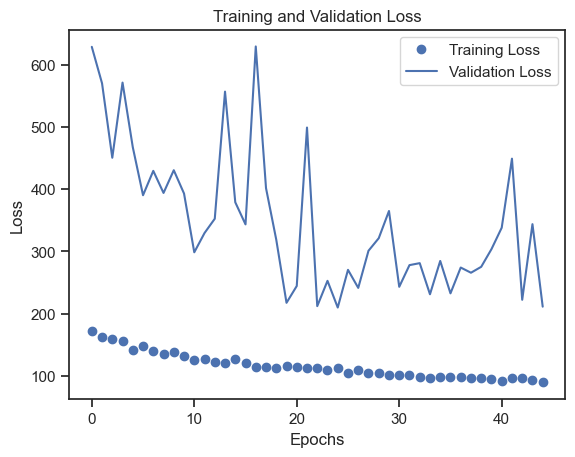

In [41]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(history.epoch, training_loss, 'bo', label='Training Loss')  
plt.plot(history.epoch, validation_loss, 'b', label='Validation Loss')  

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [62]:
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid()
plt.show()

KeyError: 'mae'

<h1>Testing the model</h1>

In [ ]:
image_path = r"C:\Users\tisha\Documents\GitHub\adv_python_project\test.jpg"
img = cv2.imread(image_path)  
img = cv2.resize(img, (200, 200))  
img = img.astype('float32') / 255.0  


img = np.expand_dims(img, axis=0)

# Check the shape
print('Image shape:', img.shape)

In [ ]:
predicted_age = model.predict(img)

print('Predicted age:', predicted_age[0][0])